In [1]:
import astropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.stats import beta, binom
from scipy.integrate import trapezoid
from numpy.random import Generator, PCG64

# Set initial seed for random sampling
beta.random_state = Generator(PCG64(seed=5731))
binom.random_state = Generator(PCG64(seed=5731))

# Morphology Data

---

In [2]:
morpho = fits.open('manga_visual_morpho-2.0.1.fits')
morpho_data = morpho[1].data
morpho[1].columns

ColDefs(
    name = 'Name'; format = '17A'
    name = 'plateifu'; format = '11A'
    name = 'MANGAID'; format = '9A'
    name = 'objra'; format = 'D'
    name = 'objdec'; format = 'D'
    name = 'Type'; format = '11A'
    name = 'TType'; format = 'I'; null = -32768
    name = 'Unsure'; format = 'I'; null = -32768
    name = 'Bars'; format = 'E'
    name = 'Edge_on'; format = 'I'; null = -32768
    name = 'Tidal'; format = 'I'; null = -32768
    name = 'C'; format = 'E'
    name = 'E_C'; format = 'E'
    name = 'A'; format = 'E'
    name = 'E_A'; format = 'E'
    name = 'S'; format = 'E'
    name = 'E_S'; format = 'E'
    name = 'cas_flag'; format = 'J'; null = -2147483648
)

In [3]:
# group galaxies according to their types
np.unique(morpho_data['Type'])

chararray(['BCD', 'E', 'E(dSph)', 'E+E', 'Edc', 'Irr', 'IrrAB', 'IrrB',
           'S', 'S-merger', 'S0', 'S0(dwarf)', 'S0a', 'SAB', 'SAB-merger',
           'SAB0', 'SAB0a', 'SABa', 'SABab', 'SABb', 'SABbc', 'SABc',
           'SABcd', 'SABd', 'SABdm', 'SABm', 'SB0', 'SB0a', 'SBa', 'SBab',
           'SBb', 'SBbc', 'SBc', 'SBcd', 'SBd', 'SBdm', 'SBm', 'Sa',
           'Sab', 'Sb', 'Sbc', 'Sc', 'Scd', 'Sd', 'Sdm', 'Sm', 'dIrr',
           'dSph', 'dwarf', 'interacting'], dtype='<U11')

In [4]:
# VERY IMPORTANT: GET RID OF REDUNDANT CHARACTERS!!!
types = np.char.strip(morpho_data['Type'])

early_types = ['E', 'E(dSph)', 'E+E', 'Edc', 'S0', 'S0a', 'S0(dwarf)', 'SAB0', 'SB0', 'SB0a', 'dSph']
late_types = ['Sa', 'Sb', 'Sbc', 'Sc', 'Sd', 'Sm', 'Sab', 'Sbc', 'Scd', 'SAB', 'SABa', 'SABb', 'SABbc', 'SABcd',
              'SBa', 'SBb', 'SBbc', 'SBcd', 'SBdm', 'SBm', 'S-merger', 'Irr', 'IrrAB', 'IrrB', 'dIrr', 'BCD', 'dwarf']

early_mask = np.isin(types, early_types)
early_galaxies = morpho_data[early_mask]

late_mask = np.isin(types, late_types)
late_galaxies = morpho_data[late_mask]

print(f"Number of early-type galaxies: {len(early_galaxies)}")
print(f"Number of late-type galaxies: {len(late_galaxies)}")
print(f'Number of all galaxies: {len(morpho_data)}')

Number of early-type galaxies: 3626
Number of late-type galaxies: 4975
Number of all galaxies: 10126


# AGN Data

---

In [5]:
agn = fits.open('manga_agn-v2_0_1.fits')
agn_data = agn[1].data
agn[1].columns

ColDefs(
    name = 'MANGAID'; format = '17A'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'WISE_AGN'; format = 'I'
    name = 'LOG_LBOL_WISE'; format = 'E'
    name = 'LOG_LBOL_WISE_ERR'; format = 'E'
    name = 'BAT_AGN'; format = 'I'
    name = 'LOG_LBOL_BAT'; format = 'E'
    name = 'LOG_LBOL_BAT_ERR'; format = 'E'
    name = 'RADIO_AGN'; format = 'I'
    name = 'LOG_LBOL_RADIO'; format = 'E'
    name = 'LOG_LBOL_RADIO_ERR'; format = 'E'
    name = 'RADIO_CLASS'; format = '4A'
    name = 'BROAD_AGN'; format = 'I'
    name = 'LOG_LBOL_BROAD'; format = 'E'
    name = 'LOG_LBOL_BROAD_ERR'; format = 'E'
)

In [6]:
# group AGN data according to the hosting galaxy types
early_mask = np.isin(agn_data['MANGAID'], early_galaxies['Name'])
early_agn = agn_data[early_mask]

late_mask = np.isin(agn_data['MANGAID'], late_galaxies['Name'])
late_agn = agn_data[late_mask]

print(f"Number of early-type galaxies with AGNs: {len(early_agn)}")
print(f"Number of late-type galaxies with AGNs: {len(late_agn)}")

Number of early-type galaxies with AGNs: 236
Number of late-type galaxies with AGNs: 112


# Data Visualization

---

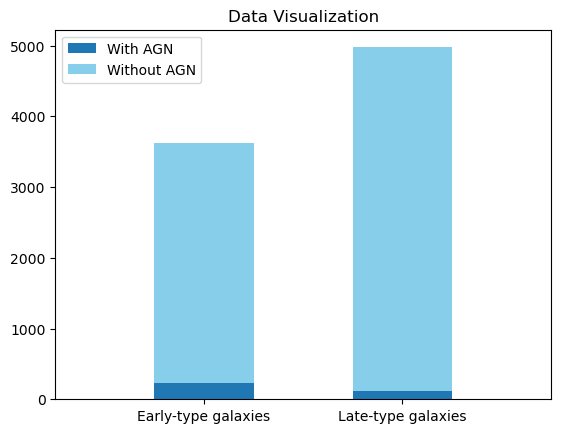

In [7]:
# plotting parameters
x = [0.3, 0.7]
bar_width = 0.2
prop_cycle = plt.rcParams['axes.prop_cycle'] # colors
colors = prop_cycle.by_key()['color']

plt.bar(x[0], len(early_agn), width=bar_width, color=colors[0], label='With AGN')
plt.bar(x[0], len(early_galaxies) - len(early_agn), width=bar_width, bottom=len(early_agn), color='skyblue', label='Without AGN')
plt.bar(x[1], len(late_agn), width=bar_width, color=colors[0])
plt.bar(x[1], len(late_galaxies) - len(late_agn), bottom=len(late_agn), width=bar_width, color='skyblue')
plt.title('Data Visualization')
plt.xticks(x, ['Early-type galaxies', 'Late-type galaxies'])
plt.xlim(0, 1)
plt.legend()
plt.show()

# Plots

---

In [8]:
# Stirling's Approximation
def strl_approx(n):
    return (n*np.log(n) - n + np.log(np.pi)/2 +
            np.log(8*n**3 + 4*n**2 + n + 1/30)/6)

# Beta Prior
def prior(theta, a, b):
    return beta.pdf(theta, a, b)

# Binomial Likelihood
def likelihood(x, theta, n):
    log_comb = strl_approx(n) - strl_approx(x) - strl_approx(n - x)
    return np.exp(log_comb + x*np.log(theta) + (n-x)*np.log(1 - theta))

# Posterior
def posterior(theta, x, n, a, b):
    post_dist = likelihood(x, theta, n) * prior(theta, a, b)
    evidence = trapezoid(post_dist, theta)
    return post_dist / evidence

# Prior Predictive
def prior_predictive(x, theta, n, a, b):
    return trapezoid(likelihood(x[:, None], theta, n) * prior(theta, a, b), theta)

# Posterior Predictive
def post_predictive(x, X, theta, n, a, b):
    return trapezoid(likelihood(x[:, None], theta, n) * posterior(theta, X, n, a, b), theta)

# Compute Quantile q
def weighted_quantile(data, weights, q):
    cdf = (np.cumsum(weights) - 0.5*weights) / np.sum(weights)
    return np.interp(q, cdf, data)

## Late-Type Galaxy Posterior and Posterior Predictive Plots

posterior max: 0.0227
95% credible interval: (0.0189, 0.0270)


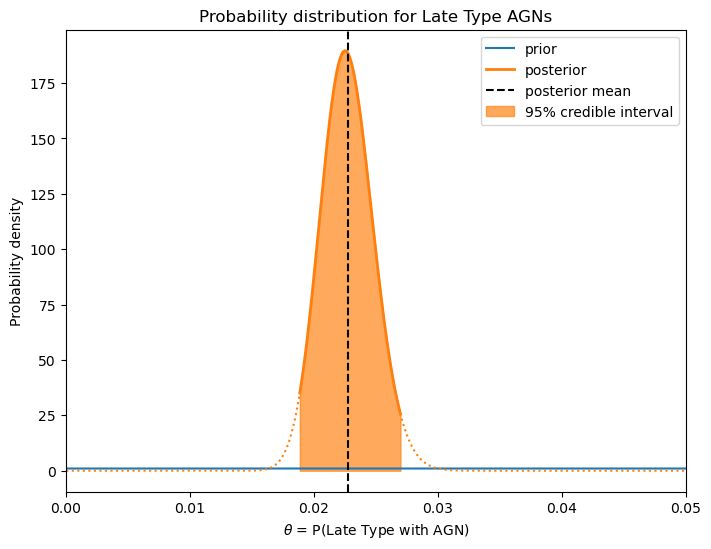

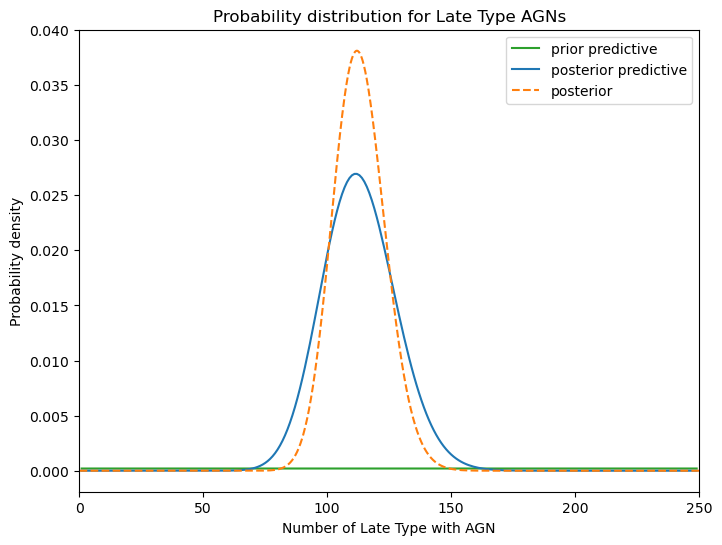

In [9]:
# Sample theta from uniform distribution and compute posterior
N_samples = 100000
a, b = 1, 1
theta = np.sort(beta.rvs(a, b, size=N_samples))
n = late_galaxies.shape[-1]
x = late_agn.shape[-1]
post_dist = posterior(theta, x, n, a, b)

# Set up credible interval
q_lv = weighted_quantile(theta, post_dist, 0.025)
q_uv = weighted_quantile(theta, post_dist, 0.975)
lv_ind = np.argmin(theta < q_lv) + 1
uv_ind = np.argmax(theta > q_uv) - 1
mid_inds = np.logical_and(theta > q_lv, theta < q_uv)

# Compute posterior mean and 95% credible interval
mean_theta = np.sum(theta*post_dist) / np.sum(post_dist)
print(f'posterior max: {mean_theta:.4f}')
print(f'95% credible interval: ({theta[lv_ind]:.4f}, {theta[uv_ind]:.4f})')

# Plot posterior distribution
plt.figure(figsize=(8, 6))
plt.plot(theta, prior(theta, a, b), label='prior')
plt.plot(theta[mid_inds], post_dist[mid_inds],
         linewidth=2, color='C1', label='posterior')
plt.plot(theta[:lv_ind+1], post_dist[:lv_ind+1],
         linestyle=':', linewidth=1.5, color='C1')
plt.plot(theta[uv_ind-1:], post_dist[uv_ind-1:],
         linestyle=':', linewidth=1.5, color='C1')
plt.axvline(mean_theta, color='k', linestyle='--', label='posterior mean')
plt.fill_between(theta[mid_inds], post_dist[mid_inds], alpha=0.67,
                 label='95% credible interval', color='C1')
plt.title('Probability distribution for Late Type AGNs')
plt.xlabel(r'$\theta$ = P(Late Type with AGN)')
plt.ylabel('Probability density')
plt.xlim(0.0, 0.05)
plt.legend()
# plt.savefig('Late_Type_Posterior.png')
plt.show()

x_cutoff = 250
x_new = np.arange(1, x_cutoff)
plt.figure(figsize=(8, 6))
plt.plot(x_new, prior_predictive(x_new, theta, n, a, b), label='prior predictive', color='C2')
plt.plot(x_new, post_predictive(x_new, x, theta, n, a, b), label='posterior predictive', color='C0')
plt.plot(theta*n, post_dist/trapezoid(post_dist, theta*n), label='posterior', linestyle='--', color='C1')
plt.title('Probability distribution for Late Type AGNs')
plt.xlabel('Number of Late Type with AGN')
plt.ylabel('Probability density')
plt.xlim(0, x_cutoff)
plt.legend()
# plt.savefig('Late_Type_Predicative.png')
plt.show()

## Early-Type Galaxy Posterior and Posterior Predictive Plots

posterior max: 0.0654
95% credible interval: (0.0575, 0.0736)


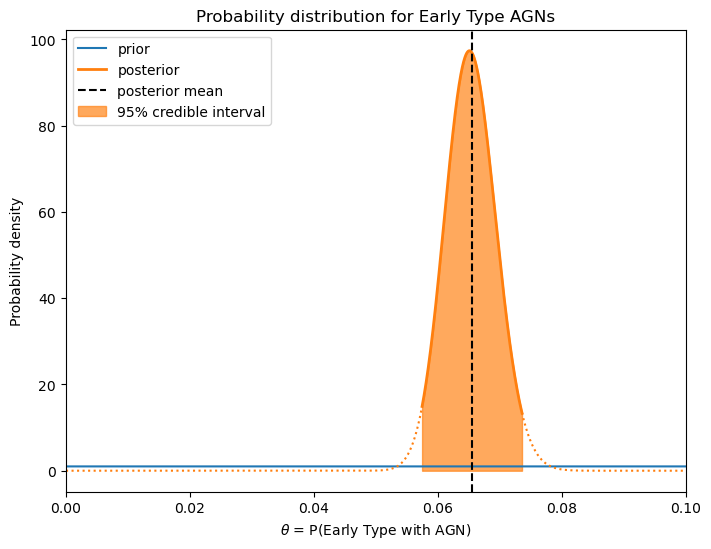

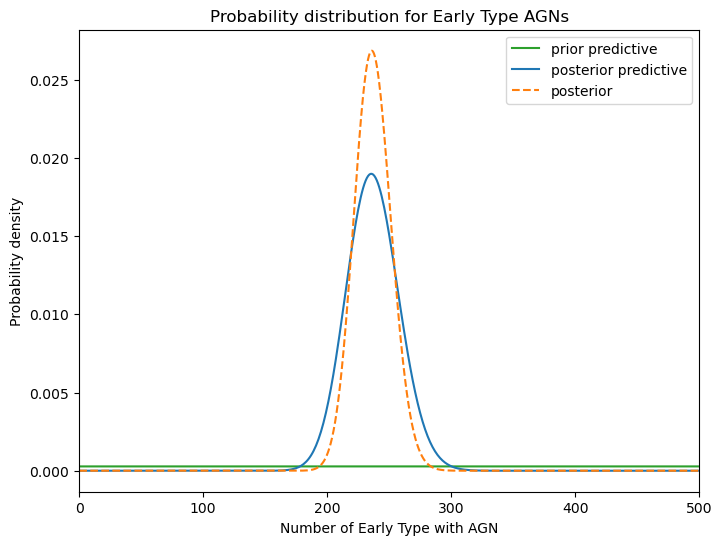

In [10]:
# Sample theta from uniform distribution and compute posterior
N_samples = 100000
a, b = 1, 1
theta = np.sort(beta.rvs(a, b, size=N_samples))
n = early_galaxies.shape[-1]
x = early_agn.shape[-1]
post_dist = posterior(theta, x, n, a, b)

# Set up credible interval
q_lv = weighted_quantile(theta, post_dist, 0.025)
q_uv = weighted_quantile(theta, post_dist, 0.975)
lv_ind = np.argmin(theta < q_lv) + 1
uv_ind = np.argmax(theta > q_uv) - 1
mid_inds = np.logical_and(theta > q_lv, theta < q_uv)

# Compute posterior maximum and 95% credible interval
mean_theta = np.sum(theta*post_dist) / np.sum(post_dist)
print(f'posterior max: {mean_theta:.4f}')
print(f'95% credible interval: ({theta[lv_ind]:.4f}, {theta[uv_ind]:.4f})')

# Plot posterior distribution
plt.figure(figsize=(8, 6))
plt.plot(theta, prior(theta, a, b), label='prior')
plt.plot(theta[mid_inds], post_dist[mid_inds],
         linewidth=2, color='C1', label='posterior')
plt.plot(theta[:lv_ind+1], post_dist[:lv_ind+1],
         linestyle=':', linewidth=1.5, color='C1')
plt.plot(theta[uv_ind-1:], post_dist[uv_ind-1:],
         linestyle=':', linewidth=1.5, color='C1')
plt.axvline(mean_theta, color='k', linestyle='--', label='posterior mean')
plt.fill_between(theta[mid_inds], post_dist[mid_inds], alpha=0.67,
                 label='95% credible interval', color='C1')
plt.title('Probability distribution for Early Type AGNs')
plt.xlabel(r'$\theta$ = P(Early Type with AGN)')
plt.ylabel('Probability density')
plt.xlim(0.0, 0.1)
plt.legend()
# plt.savefig('Early_Type_Posterior.png')
plt.show()

x_cutoff = 500
x_new = np.arange(1, x_cutoff)
plt.figure(figsize=(8, 6))
plt.plot(x_new, prior_predictive(x_new, theta, n, a, b), label='prior predictive', color='C2')
plt.plot(x_new, post_predictive(x_new, x, theta, n, a, b), label='posterior predictive', color='C0')
plt.plot(theta*n, post_dist/trapezoid(post_dist, theta*n), label='posterior', linestyle='--', color='C1')
plt.title('Probability distribution for Early Type AGNs')
plt.xlabel('Number of Early Type with AGN')
plt.ylabel('Probability density')
plt.xlim(0, x_cutoff)
plt.legend()
# plt.savefig('Early_Type_Predicative.png')
plt.show()

## Combined Early-Type and Late-Type Galaxy Posterior Plot

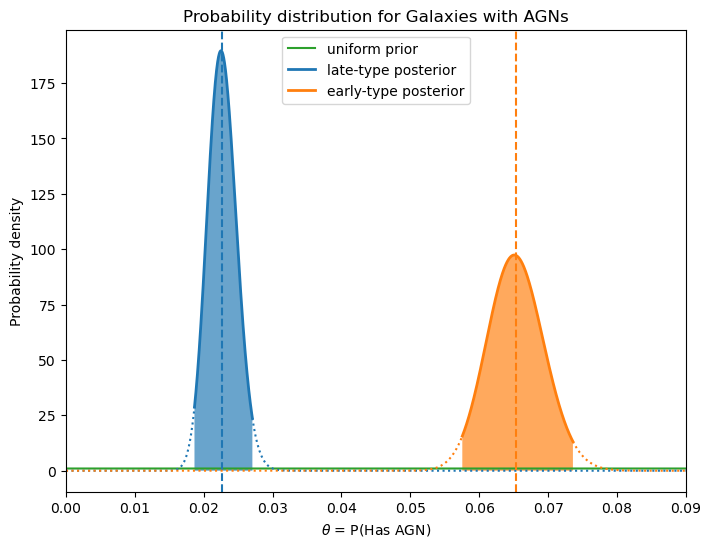

In [11]:
# Sample theta from uniform distribution
N_samples = 100000
a, b = 1, 1
theta = np.sort(beta.rvs(a, b, size=N_samples))
n = [late_galaxies.shape[-1], early_galaxies.shape[-1]]
x = [late_agn.shape[-1], early_agn.shape[-1]]

plt.figure(figsize=(8, 6))
plt.plot(theta, prior(theta, a, b), label='uniform prior', color='C2')
for ii, lab in enumerate(['late', 'early']):
    post_dist = posterior(theta, x[ii], n[ii], a, b)

    # Set up credible interval
    q_lv = weighted_quantile(theta, post_dist, 0.025)
    q_uv = weighted_quantile(theta, post_dist, 0.975)
    lv_ind = np.argmin(theta < q_lv) + 1
    uv_ind = np.argmax(theta > q_uv) - 1
    mid_inds = np.logical_and(theta > q_lv, theta < q_uv)
    mean_theta = np.sum(theta*post_dist) / np.sum(post_dist)

    # Plot posterior distribution
    plt.plot(theta[mid_inds], post_dist[mid_inds],
             linewidth=2, color=f'C{ii}', label=f'{lab}-type posterior')
    plt.plot(theta[:lv_ind+1], post_dist[:lv_ind+1],
             linestyle=':', linewidth=1.5, color=f'C{ii}')
    plt.plot(theta[uv_ind-1:], post_dist[uv_ind-1:],
             linestyle=':', linewidth=1.5, color=f'C{ii}')
    plt.axvline(mean_theta, color=f'C{ii}', linestyle='--') #, label=f'{lab}-type posterior mean')
    plt.fill_between(theta[mid_inds], post_dist[mid_inds], alpha=0.67) #,
                     # label=f'{lab}-type 95% credible interval', color=f'C{ii}')

plt.title('Probability distribution for Galaxies with AGNs')
plt.xlabel(r'$\theta$ = P(Has AGN)')
plt.ylabel('Probability density')
plt.xlim(0.0, 0.09)
plt.legend()
# plt.savefig('Posterior.png')
plt.show()

## Combined Early-Type and Late-Type Galaxy Posterior Predictive Plot

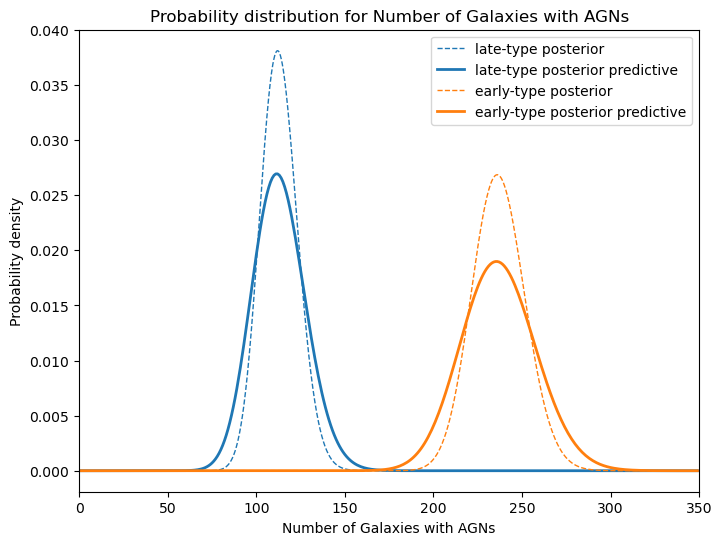

In [12]:
# Sample theta from uniform distribution
N_samples = 100000
a, b = 1, 1
theta = np.sort(beta.rvs(a, b, size=N_samples))
n = [late_galaxies.shape[-1], early_galaxies.shape[-1]]
x = [late_agn.shape[-1], early_agn.shape[-1]]
x_cutoff = 350
x_new = np.arange(1, x_cutoff)

plt.figure(figsize=(8, 6))
for ii, lab in enumerate(['late', 'early']):
    post_dist = posterior(theta, x[ii], n[ii], a, b)
    plt.plot(theta*n[ii], post_dist/trapezoid(post_dist, theta*n[ii]), 
             label=f'{lab}-type posterior', linestyle='--', linewidth=1, color=f'C{ii}')
    plt.plot(x_new, post_predictive(x_new, x[ii], theta, n[ii], a, b), 
             label=f'{lab}-type posterior predictive', linewidth=2, color=f'C{ii}')

plt.title('Probability distribution for Number of Galaxies with AGNs')
plt.xlabel('Number of Galaxies with AGNs')
plt.ylabel('Probability density')
plt.xlim(0, x_cutoff)
plt.legend()
# plt.savefig('Posterior_Predictive.png')
plt.show()

## Late-Type Galaxy Prior Predictive Plot

/tmp/ipykernel_1682/2689721772.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta_1 = float(beta.rvs(1, 1, size = 1))


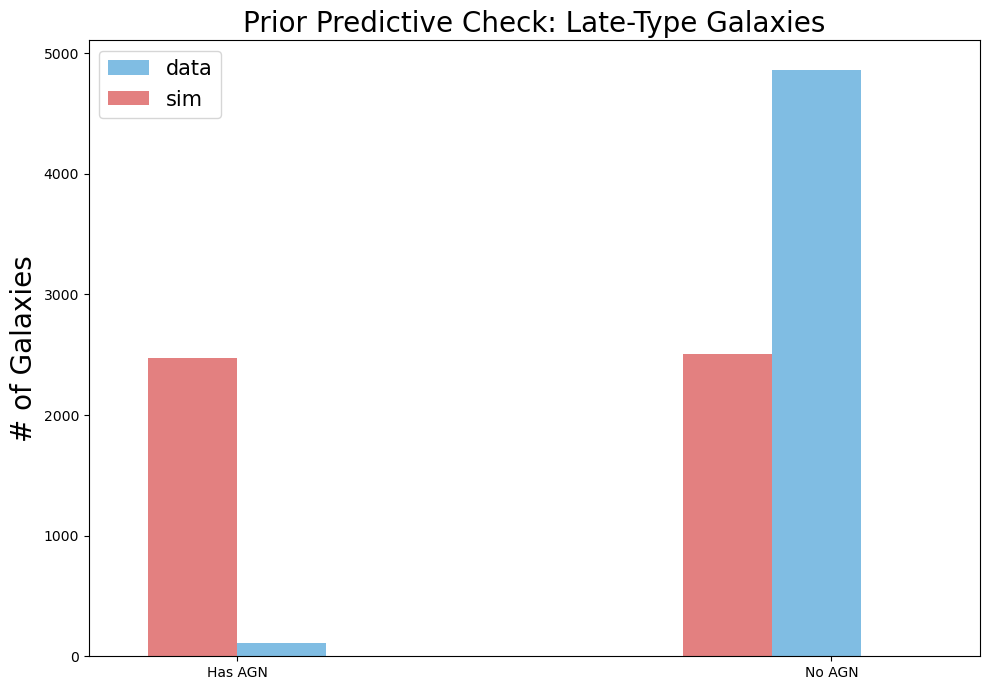

In [13]:
msim = len(late_galaxies)
ppd_mean_1 = np.zeros(msim)
sim = []

for i in range(msim):
    theta_1 = float(beta.rvs(1, 1, size = 1))
    n = late_galaxies.shape[-1]
    ppnb_dat1 = binom.rvs(1,theta_1, size=n)
    ppd_mean_1[i] = np.round(np.mean(ppnb_dat1),0)
    if ppd_mean_1[i] == 0:
        sim.append('Has AGN')
    else:
        sim.append('No AGN')
        
plt.figure(figsize=(10,7))
hist=np.concatenate((np.array(['Has AGN']*len(late_agn)), np.array(['No AGN']*(len(late_galaxies)-len(late_agn)))))
plt.hist(hist,label='data',color='#80bde3ff',width=0.15)
plt.hist(sim,label='sim',color='#e38080ff',width=-0.15)
plt.title('Prior Predictive Check: Late-Type Galaxies',fontsize=20)
plt.legend(fontsize=15)
plt.xlim(-0.25,1.25)
plt.ylabel('# of Galaxies',fontsize=20)
plt.tight_layout()
plt.show()

## Early-Type Galaxy Prior Predictive Plot

/tmp/ipykernel_1682/1311029778.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta_1 = float(beta.rvs(1, 1, size = 1))


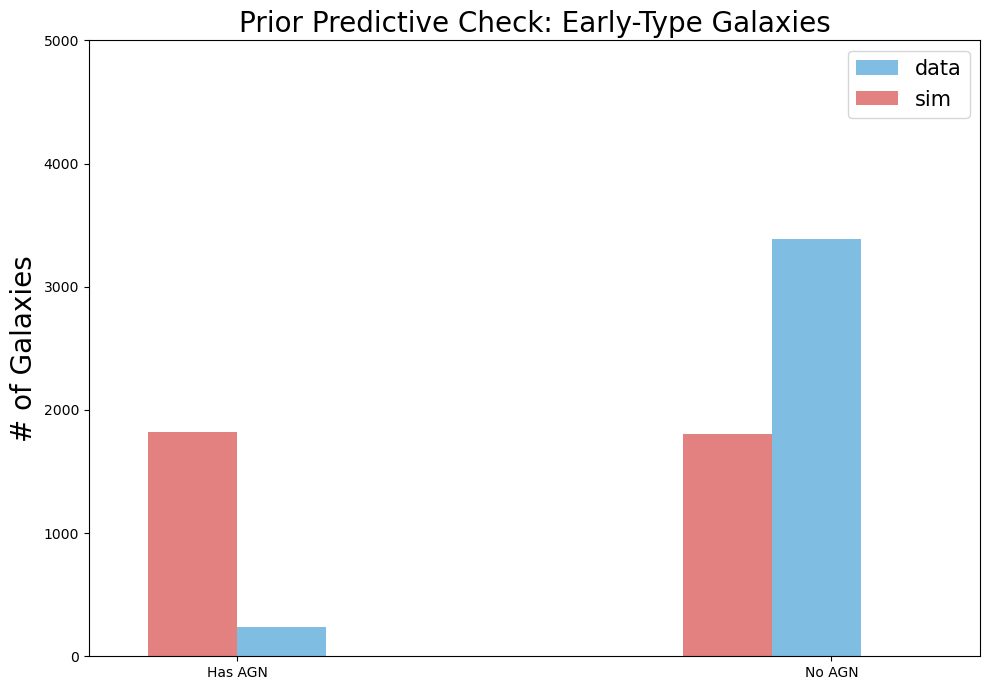

In [15]:
msim = len(early_galaxies)
ppd_mean_1 = np.zeros(msim)
sim = []

for i in range(msim):
    theta_1 = float(beta.rvs(1, 1, size = 1))
    n = early_galaxies.shape[-1]
    x = early_agn.shape[-1]
    ppnb_dat1 = binom.rvs(1,theta_1, size=n)
    ppd_mean_1[i] = np.round(np.mean(ppnb_dat1),0)
    if ppd_mean_1[i] == 0:
        sim.append('Has AGN')
    else:
        sim.append('No AGN')
        
plt.figure(figsize=(10,7))
hist=np.concatenate((np.array(['Has AGN']*len(early_agn)), np.array(['No AGN']*(len(early_galaxies)-len(early_agn)))))
plt.hist(hist,label='data',color='#80bde3ff',width=0.15)
plt.hist(sim,label='sim',color='#e38080ff',width=-0.15)
plt.title('Prior Predictive Check: Early-Type Galaxies',fontsize=20)
plt.legend(fontsize=15)
plt.xlim(-0.25,1.25)
plt.ylim(0,5000)
plt.ylabel('# of Galaxies',fontsize=20)
plt.tight_layout()
plt.show()

# Sensitivity Analysis

---

The expectation for theta_early is 0.06556473829201093
The expectation for theta_late is 0.022896163888331003


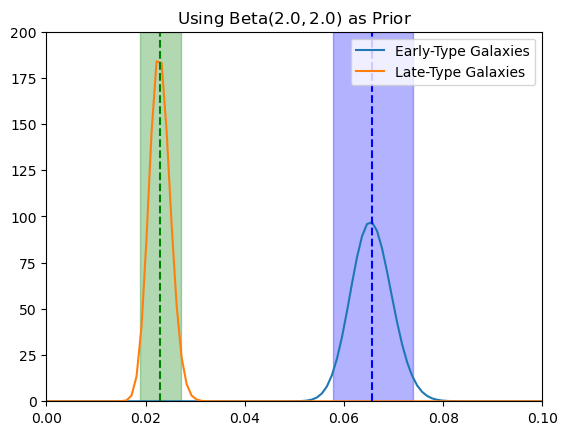

The expectation for theta_early is 0.06520540391508135
The expectation for theta_late is 0.022608520900321574


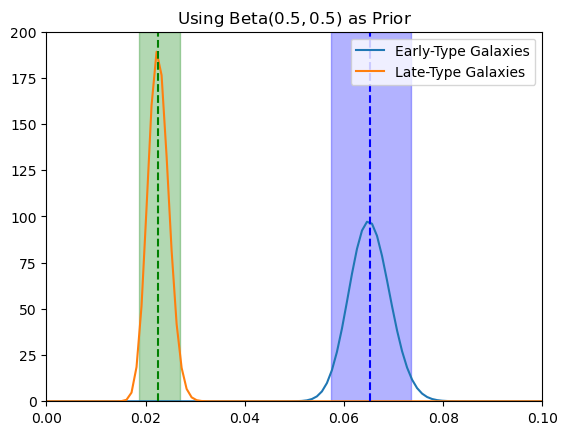

The expectation for theta_early is 0.06635462555066052
The expectation for theta_late is 0.023489259184902602


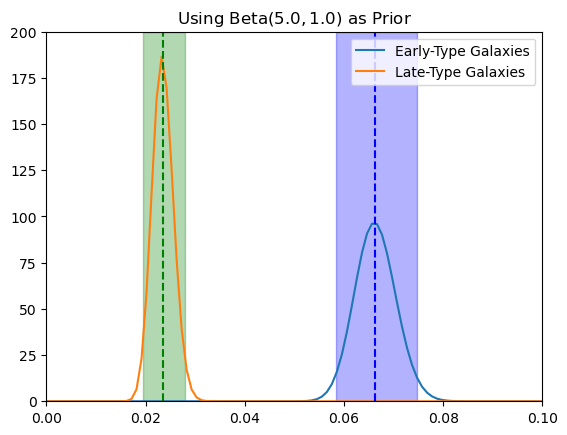

The expectation for theta_early is 0.06525330396475743
The expectation for theta_late is 0.022686207588837576


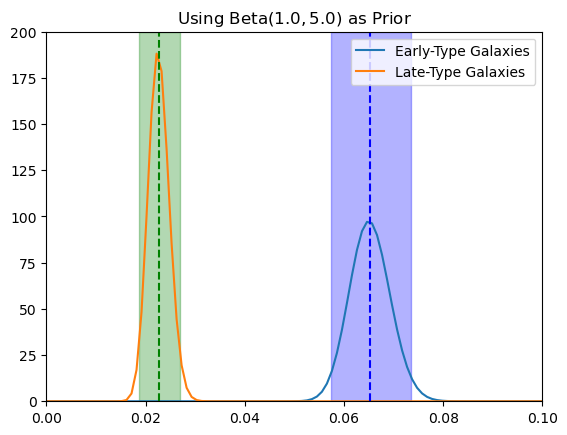

In [16]:
parameters = np.array([[2, 2], [0.5, 0.5], [5, 1], [1, 5]])

x_late, x_early = late_agn.shape[-1], early_agn.shape[-1]
n_late, n_early = late_galaxies.shape[-1], early_galaxies.shape[-1]
for a, b in parameters:
    post_early = beta(a + x_early, n_early + b - x_early)
    post_late = beta(a + x_late, n_late + b - x_late)

    x_val = np.linspace(0, 0.1, 100)
    y_early = post_early.pdf(x_val)
    y_late = post_late.pdf(x_val)
    print('The expectation for theta_early is', post_early.expect())
    print('The expectation for theta_late is', post_late.expect())

    plt.figure()
    plt.plot(x_val, y_early, label='Early-Type Galaxies')
    plt.plot(x_val, y_late, label='Late-Type Galaxies')
    plt.axvline(post_early.expect(), c='b', ls='--')
    plt.axvline(post_late.expect(), c='g', ls='--')
    plt.axvspan(post_early.ppf(0.025), post_early.ppf(0.975), color='b', alpha=0.3)
    plt.axvspan(post_late.ppf(0.025), post_late.ppf(0.975), color='g', alpha=0.3)
    plt.xlim(0, 0.1)
    plt.ylim(0, 200)
    plt.legend()
    plt.title(rf'Using $\mathrm {{Beta}} ({a} ,{b} )$ as Prior')
    plt.show()

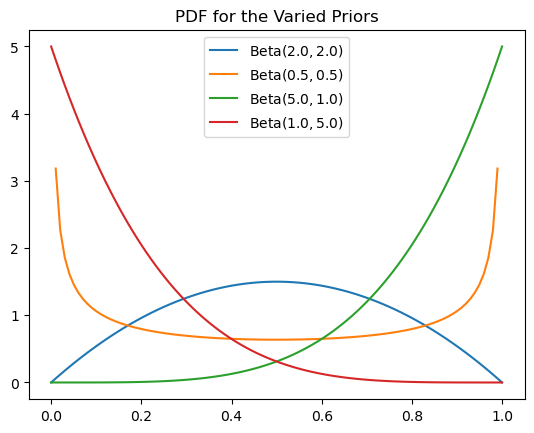

In [17]:
parameters = np.array([[2, 2], [0.5, 0.5], [5, 1], [1, 5]])
for a, b in parameters:
    prior = beta(a, b)
    x_val = np.linspace(0, 1, 100)
    y_val = prior.pdf(x_val)
    plt.plot(x_val, y_val, label=rf'$\mathrm{{Beta}} ({a} ,{b} )$')
plt.legend()
plt.title('PDF for the Varied Priors')
plt.show()